In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/StudyData/cancer_patient_dataset.xlsx')
df.head()

In [ ]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Target Binary
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.365000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.481671
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,1.000000


In [ ]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
df['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
risk_dictionary_binary_class = {'High':1,'Medium':0,'Low':0}
df['Target Binary']=df['Level'].map(risk_dictionary_binary_class)

In [ ]:
df[['Level','Target Binary']].head()

,Level,Target Binary
0,Low,0
1,Medium,0
2,High,1
3,High,1
4,High,1


In [ ]:
X = df.drop(['Patient Id','Level','Target Binary'],axis=1)
y = df['Target Binary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')

Train : (800, 23), Test : (200, 23)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (640, 23), Test : (160, 23)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
binary_classifier = Sequential()
binary_classifier.add(Dense(4,activation='relu',input_dim=23))
binary_classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
binary_classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 96        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
binary_classifier.compile(loss='binary_crossentropy',optimizer='adam',
                          metrics='accuracy')

In [1]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',verbose=1)
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Temp/cancer_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

In [2]:
binary_classifier_history = binary_classifier.fit(X_train, y_train, batch_size=10,
                      validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=90)

NameError: name 'binary_classifier' is not defined

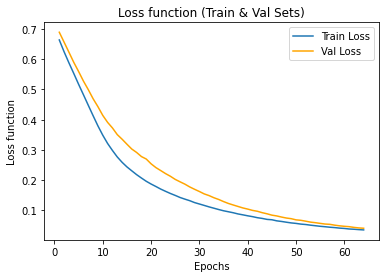

In [ ]:
loss_function = binary_classifier_history.history['loss']
val_loss_function = binary_classifier_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

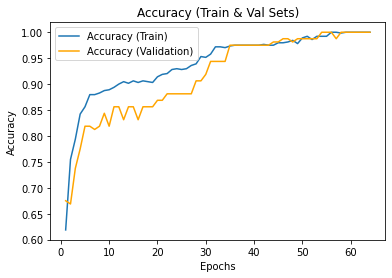

In [ ]:
acc = binary_classifier_history.history['accuracy']
val_acc = binary_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

# load a saved model
#from keras.models import load_model
#saved_model = load_model('best_model.h5')
binary_classifier.load_weights('/content/gdrive/My Drive/Temp/cancer_weights-54-1.000.hdf5')

In [ ]:
results = binary_classifier.evaluate(X_test,y_test)

In [ ]:
x_test_pattern = X_test[1,:]
y_pred = binary_classifier.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 50ms/step
[0.00703533]


In [ ]:
x_test_pattern

array([0.06779661, 1.        , 0.28571429, 0.14285714, 0.        ,
       0.28571429, 0.16666667, 0.        , 0.33333333, 0.16666667,
       0.        , 0.14285714, 0.125     , 0.125     , 0.125     ,
       0.14285714, 0.        , 0.28571429, 0.42857143, 0.375     ,
       0.        , 0.5       , 0.        ])

In [ ]:
y_test

570    0
272    0
586    1
100    1
438    1
      ..
588    0
275    0
848    0
939    0
456    0
Name: Target Binary, Length: 200, dtype: int64

In [ ]:
print(x_test_pattern)

In [ ]:
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
original_features

array([[18.,  2.,  3.,  2.,  1.,  3.,  2.,  1.,  3.,  2.,  1.,  2.,  2.,
         2.,  2.,  2.,  1.,  3.,  4.,  4.,  1.,  4.,  1.]])

In [ ]:
risk_dictionary_multi_class = {'High':2,'Medium':1,'Low':0}
df['Target Multi']=df['Level'].map(risk_dictionary_multi_class)

In [ ]:
X = df.drop(['Patient Id','Level','Target Binary','Target Multi'],axis=1)
y = df['Target Multi']

In [ ]:
X = min_max_scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_all_train.shape}, Test : {X_test.shape}')

Train : (800, 23), Test : (200, 23)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, 
                                                  stratify=y_all_train, test_size = 0.2, 
                                                  random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
multi_classifier = Sequential()
multi_classifier.add(Dense(8,activation='relu',input_dim=23))
multi_classifier.add(Dense(3,activation='softmax'))

In [ ]:
multi_classifier.compile(loss='categorical_crossentropy',optimizer='adam',
                          metrics='accuracy')

In [ ]:
multi_classifier_history = multi_classifier.fit(X_train, y_train, batch_size=10,
                      validation_data=(X_val,y_val), epochs=50)

Epoch 1/50
64/64 [==============================] - 2s 10ms/step - loss: 1.0301 - accuracy: 0.4109 - val_loss: 0.9765 - val_accuracy: 0.4875
Epoch 2/50
64/64 [==============================] - 0s 5ms/step - loss: 0.9490 - accuracy: 0.5094 - val_loss: 0.9283 - val_accuracy: 0.5562
Epoch 3/50
64/64 [==============================] - 0s 5ms/step - loss: 0.9008 - accuracy: 0.5734 - val_loss: 0.8869 - val_accuracy: 0.6375
Epoch 4/50
64/64 [==============================] - 0s 5ms/step - loss: 0.8548 - accuracy: 0.6250 - val_loss: 0.8431 - val_accuracy: 0.6500
Epoch 5/50
64/64 [==============================] - 0s 6ms/step - loss: 0.8075 - accuracy: 0.6687 - val_loss: 0.7943 - val_accuracy: 0.6938
Epoch 6/50
64/64 [==============================] - 0s 5ms/step - loss: 0.7534 - accuracy: 0.7016 - val_loss: 0.7468 - val_accuracy: 0.7500
Epoch 7/50
64/64 [==============================] - 0s 6ms/step - loss: 0.6999 - accuracy: 0.7359 - val_loss: 0.6980 - val_accuracy: 0.7688
Epoch 8/50
64/64 [=

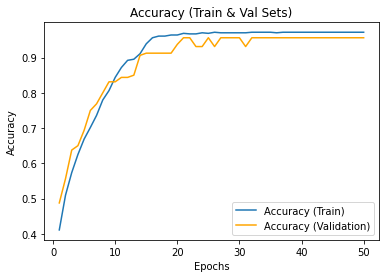

In [ ]:
acc = multi_classifier_history.history['accuracy']
val_acc = multi_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(y_test[4])

[0. 1. 0.]


In [ ]:
x_test_pattern = X_test[4,:]
original_features= min_max_scaler.inverse_transform(x_test_pattern.reshape(1,-1))
print(original_features)

y_pred = multi_classifier.predict(x_test_pattern.reshape(1,-1))
print(y_pred[0])

[[31.  2.  3.  2.  4.  2.  3.  2.  3.  3.  2.  2.  3.  3.  4.  5.  6.  5.
   5.  4.  6.  5.  4.]]
1/1 [==============================] - 0s 33ms/step
[7.4593648e-03 9.9167013e-01 8.7054586e-04]
